# Chapter 11: Properties of Stock Options 📈

In this chapter, we cover the fundamental properties of stock options and key relationships that drive option pricing.

### Key Topics Covered:

1. **Factors Affecting Option Prices**:
   The six main factors affecting options prices are:
   - Stock price $(S_0)$
   - Strike price $(K)$
   - Time to expiration $(T)$ ⏳
   - Volatility 🌪️
   - Risk-free rate $(r)$
   - Dividends 💵

2. **Put-Call Parity**:
   For European options, the put-call parity relationship is:

   $C - P = S_0 - K e^{-rT}$

   Rearranged:

   $C = P + S_0 - K e^{-rT}$ or $P = C + K e^{-rT} - S_0$

   This ensures no arbitrage opportunities between European calls and puts.

3. **Bounds for Option Prices**:

   **Lower Bounds**:
   - Call option: 
   
     $C \geq \max(0, S_0 - K e^{-rT})$
   
   - Put option: 
   
     $P \geq \max(0, K e^{-rT} - S_0)$

   **Upper Bounds**:
   - Call option:
   
     $C \leq S_0$
   
   - Put option:
   
     $P \leq K e^{-rT}$

4. **Effect of Dividends**:
   Dividends reduce stock prices and thus affect options:
   - Call option value decreases with dividends 📉.
   - Put option value increases with dividends 📈.
   
   The put-call parity with continuous dividends $(q)$ becomes:

   $C - P = S_0 e^{-qT} - K e^{-rT}$

5. **Early Exercise**:
   - **American calls**: Rarely exercised early if no dividends.
   - **American puts**: Early exercise can be optimal, especially when interest rates are high.

### Key Insights:
- **Put-Call Parity**: Ensures consistent pricing between calls and puts.
- **Option Bounds**: Provide limits to prevent arbitrage.
- **Dividends**: Impact the pricing of calls and puts.
- **Early Exercise**: Relevant primarily for American options, especially puts.

This chapter builds a foundation for more advanced option pricing and hedging strategies.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

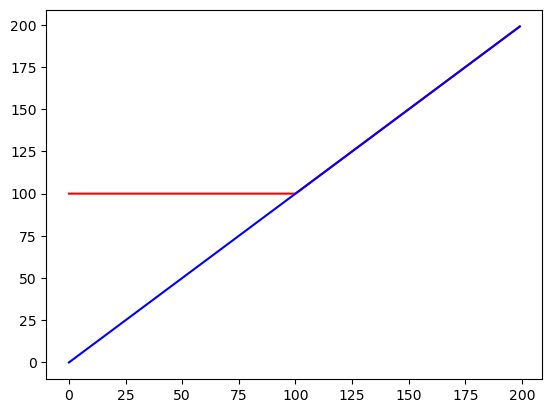

The lower bound is verified as the payoff of Portfolio A is always greater than or equal to the payoff of Portfolio B


In [9]:
# lower bound for european call option
K = 100
call_payoff = [max(0, i - K) for i in range(0, 200)]
zc_bond = [K for i in range(0, 200)]

pf_A = [call_payoff[i] + zc_bond[i] for i in range(0, 200)]
pf_B = [i for i in range(0, 200)]

#plot the two portfolios
plt.plot(pf_A, label='Portfolio A', color='red')
plt.plot(pf_B, label='Portfolio B', color='blue')
plt.show()

print('The lower bound is verified as the payoff of Portfolio A is always greater than or equal to the payoff of Portfolio B')

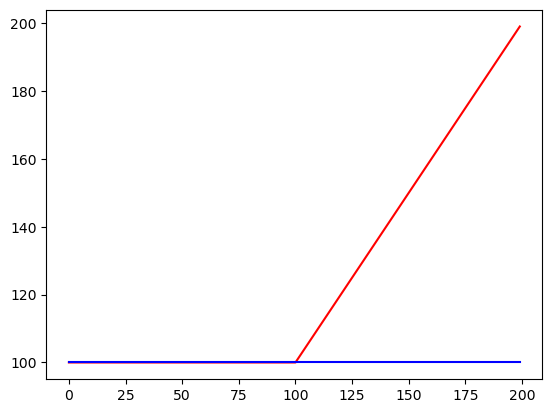

In [10]:
# upper bound for european put option
put_payoff = [max(0, K - i) for i in range(0, 200)]
underlying_stock = [i for i in range(0, 200)]

pf_C = [put_payoff[i] + underlying_stock[i] for i in range(0, 200)]
pf_D = [K for i in range(0, 200)]

#plot the two portfolios
plt.plot(pf_C, label='Portfolio C', color='red')
plt.plot(pf_D, label='Portfolio D', color='blue')
plt.show()

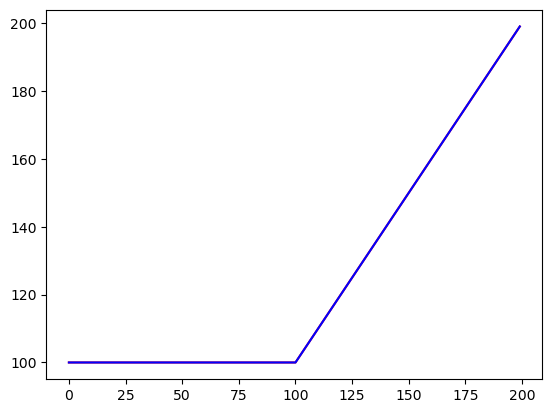

The call-put parity is verified as the payoff of Portfolio E is always equal to the payoff of Portfolio F


In [13]:
# Call_put parity
call_payoff = [max(0, i - K) for i in range(0, 200)]
cash = [K for i in range(0, 200)]

put_payoff = [max(0, K - i) for i in range(0, 200)]
underlying_stock = [i for i in range(0, 200)]

pf_E = [call_payoff[i] + cash[i] for i in range(0, 200)]
pf_F = [put_payoff[i] + underlying_stock[i] for i in range(0, 200)]

#plot the two portfolios
plt.plot(pf_E, label='Portfolio E', color='red')
plt.plot(pf_F, label='Portfolio F', color='blue')
plt.show()

print('The call-put parity is verified as the payoff of Portfolio E is always equal to the payoff of Portfolio F')

***Problems & Exercises***

In [19]:
# 11. 7 
"""
Lower bound for European call option.
"""
spot = 28
K =  25
rf = 0.08

lower_bound = spot - K * np.exp(-rf * 4/12)
print(f'the lower_bound is {lower_bound}')

the lower_bound is 3.6578562661713754


In [18]:
# 11.8
"""
Lower bound for European put option.
"""
spot = 12
K = 15
rf = 0.06

lower_bound = K * np.exp(-rf * 1/12) - spot
print(f'the lower_bound is {lower_bound}')

the lower_bound is 2.9251871878902342


In [20]:
# 11.12
"""
Pricing a put given a call.
"""
spot = 19
K_call = 20 # 3 months call
price_call = 1
rf = 0.04

price_put = price_call + K_call * np.exp(-rf * 3/12) - spot
print(f'the price of the put is {price_put}')


the price of the put is 1.800996674983363


In [21]:
# 11.14
"""
Lower bound of a call option.
"""
spot = 80
K = 75
rf = 0.1

lower_bound = spot - K * np.exp(-rf * 6/12)
print(f'the lower_bound is {lower_bound}')

the lower_bound is 8.657793162446453


In [23]:
# 11.15 
"""
Lower bound of a put option.
"""
spot = 58
K = 65
rf = 0.05

lower_bound = K * np.exp(-rf * 2/12) - spot
print(f'the lower_bound is {lower_bound}')

the lower_bound is 6.460584021526941


In [34]:
# 11.16
"""
Looking for an arbitrage opportunity.
"""
price_call = 5 # 4 months call
spot = 64
K = 60
dividend = 0.8 # in 1 month
rf = 0.12

lower_bound = spot - K * np.exp(-rf * 4/12) - dividend * np.exp(-rf * 1/12)
print(f'the lower_bound is {lower_bound}')

# As the lower bound is inferior to the price of the call, there is an arbitrage opportunity.
# long the call, short the stock and invest the proceeds at a risk-free rate taking into account the dividend to pay and the strike to pay at maturity.

arbitrage_profit = -price_call + spot - K * np.exp(-rf * 4/12) - dividend * np.exp(-rf * 1/12)
print(f'the arbitrage profit is {arbitrage_profit}')

the lower_bound is 5.560593783861276
the arbitrage profit is 0.5605937838612762


In [40]:
# 11.17
"""
Looking for an arbitrage opportunity.
"""
put_price = 2.5 # 1 month put
spot = 47
K = 50
rf = 0.06

lower_bound = K * np.exp(-rf * 1/12) - spot
print(f'the lower_bound is {lower_bound}')

# As the lower bound is inferior to the price of the put, there is an arbitrage opportunity.
# borrow (put_price + spot) at rf + long put + long stock

arbitrage_profit = -put_price - spot + K * np.exp(-rf * 1/12)
print(f'the arbitrage profit is {arbitrage_profit}')

the lower_bound is 2.750623959634119
the arbitrage profit is 0.2506239596341189


In [44]:
# 11.19
"""
Pricing a put given a call.
"""
maturity_call = 6/12
maturity_div1 = 2/12
maturity_div2 = 5/12
K = 30
call_price = 2
spot = 29
dividend = 0.5
rf = 0.1

put_price = call_price + K * np.exp(-rf * maturity_call) + dividend * np.exp(-rf * maturity_div1) + dividend * np.exp(-rf * maturity_div2) - spot
print(f'the put price is {put_price}')

the put price is 2.5082131904867992
